<a href="https://colab.research.google.com/github/adnan855570/Edge_Detection_of_Face_images/blob/main/Edge_Detection_of_face_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

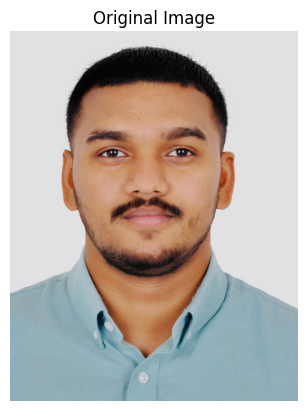

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load your uploaded image
image_path = "/content/IMG_1097.jpg"
image = cv2.imread(image_path)

# Convert from BGR to RGB (for correct display in Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")  # Hide axes
plt.show()


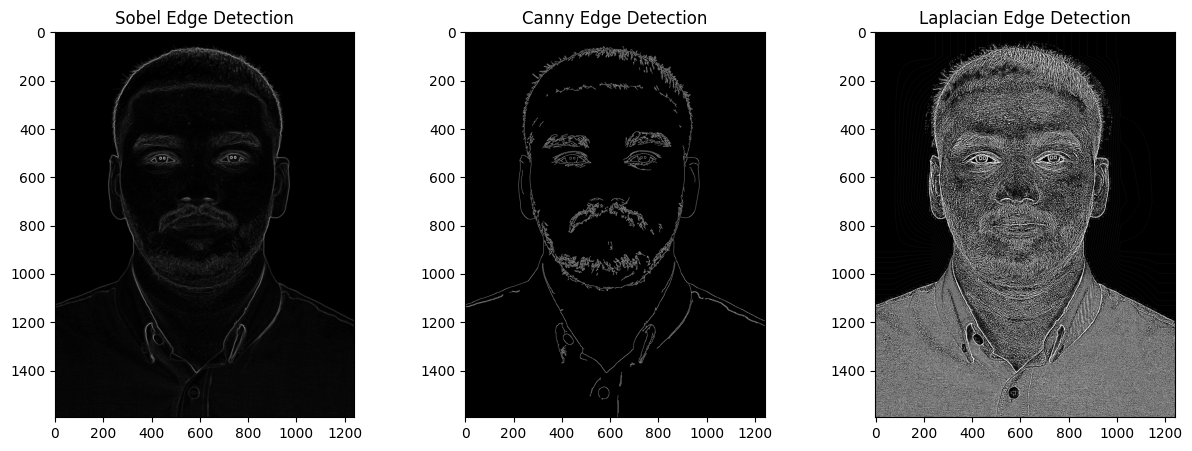

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_path = "IMG_1097.jpg"  # Change this if needed
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred_gray = cv2.GaussianBlur(gray, (3, 3), 0)

# Apply Sobel operator
sobel_x = cv2.Sobel(blurred_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)

# Apply Canny Edge Detector
canny = cv2.Canny(blurred_gray, 50, 150)  # Adjusted thresholds for better detection

# Apply Adaptive Histogram Equalization (CLAHE) to enhance contrast
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
equalized_gray = clahe.apply(gray)

# Apply Laplacian Operator with optimized settings
laplacian = cv2.Laplacian(equalized_gray, cv2.CV_8U, ksize=5)

# Display results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(sobel, cmap='gray'); ax[0].set_title('Sobel Edge Detection')
ax[1].imshow(canny, cmap='gray'); ax[1].set_title('Canny Edge Detection')
ax[2].imshow(laplacian, cmap='gray'); ax[2].set_title('Laplacian Edge Detection')

plt.show()


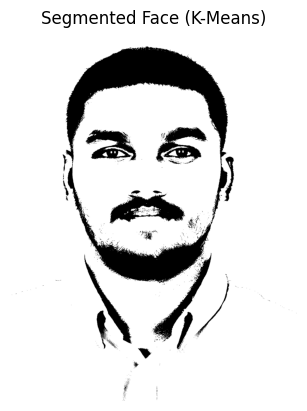

In [ ]:
import numpy as np

# Reshape image for clustering
pixel_vals = gray.reshape((-1, 1))
pixel_vals = np.float32(pixel_vals)

# Define K-Means parameters
k = 2  # Number of clusters (face vs. background)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers back to uint8
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()].reshape(gray.shape)

# Show segmented face
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Face (K-Means)")
plt.axis("off")
plt.show()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 145MB/s]


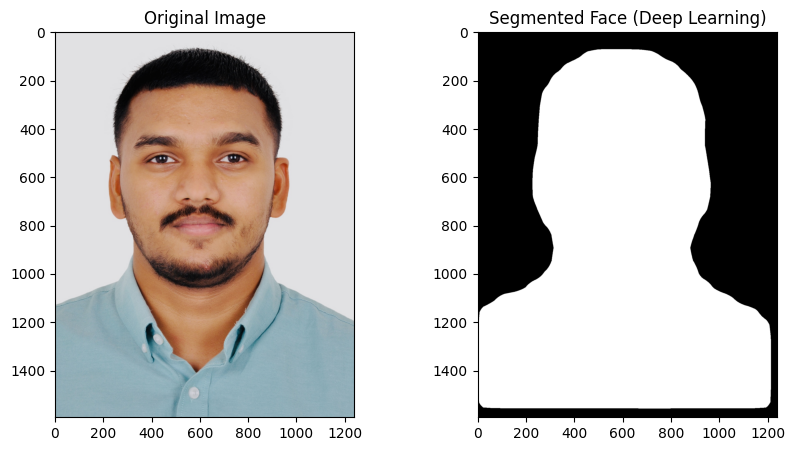

In [ ]:
import torch
import torchvision
from torchvision import transforms
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained Mask R-CNN model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set to evaluation mode

# Load your face image
image_path = "IMG_1097.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to tensor
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image_rgb).unsqueeze(0)

# Run the model on the image
with torch.no_grad():
    output = model(image_tensor)

# Extract masks and scores
masks = output[0]['masks']
scores = output[0]['scores']

# Only keep the masks with high confidence (threshold = 0.9)
threshold = 0.9
face_masks = [masks[i] for i in range(len(scores)) if scores[i] > threshold]

# Create an empty mask image
segmented_face = np.zeros_like(image_rgb[:, :, 0], dtype=np.uint8)

# Overlay the detected mask
for mask in face_masks:
    mask = mask.squeeze().numpy()
    mask = (mask > 0.5).astype(np.uint8) * 255  # Convert to binary mask
    segmented_face = np.maximum(segmented_face, mask)

# Display the segmented result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(segmented_face, cmap="gray")
plt.title("Segmented Face (Deep Learning)")

plt.show()
